In [2]:
from utilities import *

In [3]:
deep_network_layers = [10,5, 5, 5,1]
epochs = 20000
learning_rate = 1e-2
noise_power = 0.05

In [4]:
X = np.load('X.npy')
y = np.load('y.npy') 
y += np.sqrt(noise_power)*np.random.randn(y.shape[0])

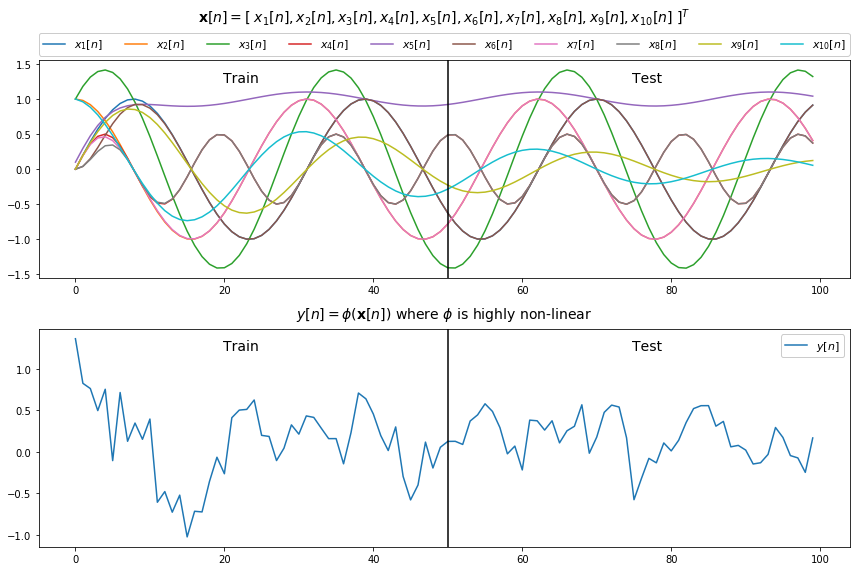

In [5]:
plot_data(X, y)

In [6]:
models = [LMS(), nonlinear_LMS(), deep_network(deep_network_layers)]

loss = train_models(X, y, models, epochs, learning_rate)

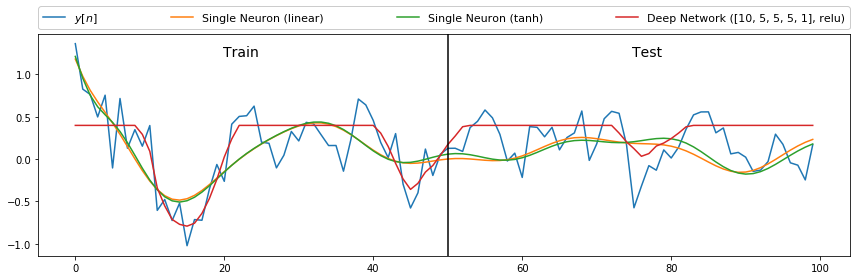

In [7]:
plot_output(X, y, models, deep_network_layers)

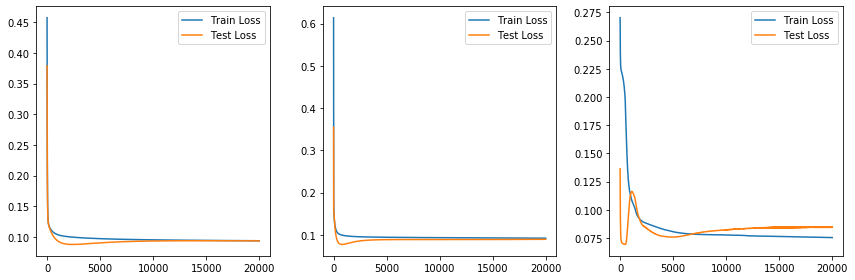

In [8]:
plot_learning_curves(loss)